## Example7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Basic parameters
np.random.seed(42)  # Setting seed for reproducibility
a = 1
b = 1
m0 = 2
m1 = 20
m2 = 1
w1 = np.random.rand(m1, m0 + 1)
w2 = np.random.rand(m2, m1 + 1)
eta = 0.01

### Figure 24 (a)

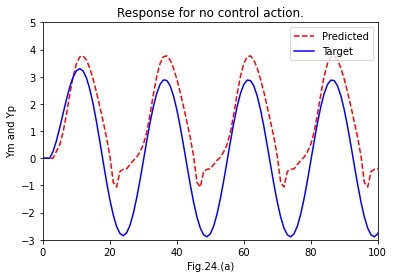

In [4]:
# specific parameters in this figure
steps = np.arange(0, 100)
yp = np.array([0, 0])
ym = np.array([0, 0])
u = 0

# model training
for k in range(len(steps)):
    p = np.array([1, yp[-1], yp[-2]])
    r = np.sin(2 * np.pi * k / 25)
    yp1 = yp[-2] * yp[-1] * (yp[-1] + 2.5)/(1 + (yp[-1])**2 + (yp[-2])**2) + u
    ym1 = 0.6 * ym[-1] + 0.2 * ym[-2] + r

    # forward
    v1 = np.dot(w1, p)
    phi_v1 = a * np.tanh(b * v1)
    y1_k = np.concatenate(([1], phi_v1))
    v2 = np.dot(w2, y1_k)
    y2 = v2
    error = yp1 - u - y2
    phi_v2_diff = 1
    phi_v1_diff = (b / a) * (a**2 - (phi_v1**2))

    # backward
    delta2 = error * phi_v2_diff
    delta_w2 = eta * np.outer(delta2, y1_k)
    delta1 = np.dot(w2[:, 1:].T, delta2) * phi_v1_diff
    delta_w1 = eta * np.outer(delta1, p)
    w1 += delta_w1
    w2 +=  delta_w2
    
    u = r
    yp = np.append(yp, yp1)
    ym = np.append(ym, ym1)


# Plotting figure
K = np.arange(0, len(steps)+2)
plt.figure()
plt.plot(K, yp, '--r', K, ym, '-b')
plt.legend(['Predicted', 'Target'], loc='upper right')
plt.xlabel('Fig.24.(a)')
plt.ylabel('Ym and Yp')
plt.title('Response for no control action.')
plt.axis([0, 100, -3, 5])
plt.show()

### Figure 24 (b)

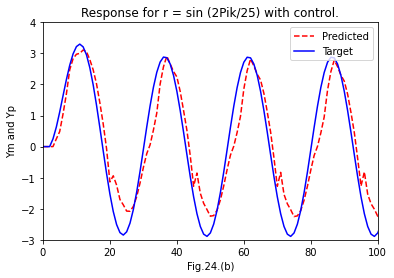

In [10]:
# specific parameters in this figure
steps = np.arange(0, 100)
yp = np.array([0, 0])
ym = np.array([0, 0])
u = 0

# model training
for k in range(len(steps)):
    p = np.array([1, yp[-1], yp[-2]])
    r = np.sin(2 * np.pi * k / 25)
    yp1 = yp[-2] * yp[-1] * (yp[-1] + 2.5)/(1 + (yp[-1])**2 + (yp[-2])**2) + u
    ym1 = 0.6 * ym[-1] + 0.2 * ym[-2] + r

    # forward
    v1 = np.dot(w1, p)
    phi_v1 = a * np.tanh(b * v1)
    y1_k = np.concatenate(([1], phi_v1))
    v2 = np.dot(w2, y1_k)
    y2 = v2
    error = yp1 - u - y2
    phi_v2_diff = 1
    phi_v1_diff = (b / a) * (a**2 - (phi_v1**2))

    # backward
    delta2 = error * phi_v2_diff
    delta_w2 = eta * np.outer(delta2, y1_k)
    delta1 = np.dot(w2[:, 1:].T, delta2) * phi_v1_diff
    delta_w1 = eta * np.outer(delta1, p)
    w1 = w1 + delta_w1
    w2 = w2 + delta_w2
    
    u = -y2 + 0.6 * yp[-1] + 0.2 * yp[-2] + r
    yp = np.append(yp, yp1)
    ym = np.append(ym, ym1)

# Plotting figure
K = np.arange(0, len(steps)+2)
plt.figure()
plt.plot(K, yp, '--r', K, ym, '-b')
plt.legend(['Predicted', 'Target'], loc='upper right')
plt.xlabel('Fig.24.(b)')
plt.ylabel('Ym and Yp')
plt.title('Response for r = sin (2Pik/25) with control.')
plt.axis([0, 100, -3, 4])
plt.show()

### Figure 25 (a)

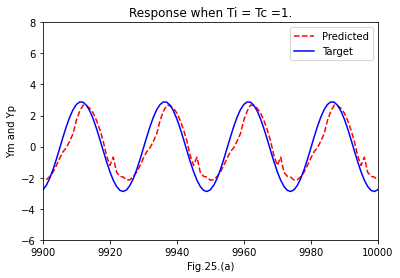

In [11]:
# specific parameters in this figure
steps = np.arange(0, 10001)
yp = np.array([0, 0])
ym = np.array([0, 0])
u = 0

# model training
for k in range(len(steps)):
    p = np.array([1, yp[-1], yp[-2]])
    r = np.sin(2 * np.pi * k / 25)
    yp1 = yp[-2] * yp[-1] * (yp[-1] + 2.5)/(1 + (yp[-1])**2 + (yp[-2])**2) + u
    ym1 = 0.6 * ym[-1] + 0.2 * ym[-2] + r

    # forward
    v1 = np.dot(w1, p)
    phi_v1 = a * np.tanh(b * v1)
    y1_k = np.concatenate(([1], phi_v1))
    v2 = np.dot(w2, y1_k)
    y2 = v2
    error = yp1 - u - y2
    phi_v2_diff = 1
    phi_v1_diff = (b / a) * (a**2 - (phi_v1**2))

    # backward
    delta2 = error * phi_v2_diff
    delta_w2 = eta * np.outer(delta2, y1_k)
    delta1 = np.dot(w2[:, 1:].T, delta2) * phi_v1_diff
    delta_w1 = eta * np.outer(delta1, p)
    w1 = w1 + delta_w1
    w2 = w2 + delta_w2
    
    u = -y2 + 0.6 * yp[-1] + 0.2 * yp[-2] + r
    yp = np.append(yp, yp1)
    ym = np.append(ym, ym1)

# Plotting figure
K = np.arange(0, len(steps)+2)
plt.figure()
plt.plot(K, yp, '--r', K, ym, '-b')
plt.legend(['Predicted', 'Target'], loc='upper right')
plt.xlabel('Fig.25.(a)')
plt.ylabel('Ym and Yp')
plt.title('Response when Ti = Tc =1.')
plt.axis([9900, 10000, -6, 8])
plt.show()

### Figure 25 (b)

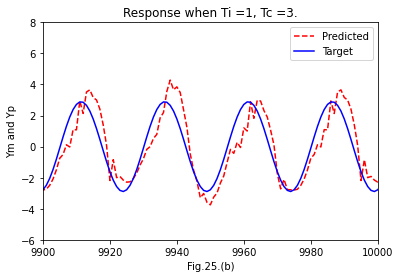

In [12]:
# specific parameters in this figure
steps = np.arange(0, 10001)
yp = np.array([0, 0])
ym = np.array([0, 0])
u = 0

# model training
for k in range(len(steps)):
    p = np.array([1, yp[-1], yp[-2]])
    r = np.sin(2 * np.pi * k / 25)
    yp1 = yp[-2] * yp[-1] * (yp[-1] + 2.5)/(1 + (yp[-1])**2 + (yp[-2])**2) + u
    ym1 = 0.6 * ym[-1] + 0.2 * ym[-2] + r

    # forward
    v1 = np.dot(w1, p)
    phi_v1 = a * np.tanh(b * v1)
    y1_k = np.concatenate(([1], phi_v1))
    v2 = np.dot(w2, y1_k)
    y2 = v2
    error = yp1 - u - y2
    phi_v2_diff = 1
    phi_v1_diff = (b / a) * (a**2 - (phi_v1**2))

    # backward
    delta2 = error * phi_v2_diff
    delta_w2 = eta * np.outer(delta2, y1_k)
    delta1 = np.dot(w2[:, 1:].T, delta2) * phi_v1_diff
    delta_w1 = eta * np.outer(delta1, p)
    w1 = w1 + delta_w1
    w2 = w2 + delta_w2
    
    # update control signal every 3 step
    if k %3 ==0:
        u = -y2 + 0.6 * yp[-1] + 0.2 * yp[-2] + r
        c = -y2
    else:
        u = c + 0.6 * yp[-1] + 0.2 * yp[-2] + r
        
    yp = np.append(yp, yp1)
    ym = np.append(ym, ym1)

# Plotting figure
K = np.arange(0, len(steps)+2)
plt.figure()
plt.plot(K, yp, '--r', K, ym, '-b')
plt.legend(['Predicted', 'Target'], loc='upper right')
plt.xlabel('Fig.25.(b)')
plt.ylabel('Ym and Yp')
plt.title('Response when Ti =1, Tc =3.')
plt.axis([9900, 10000, -6, 8])
plt.show()

### Figure 26

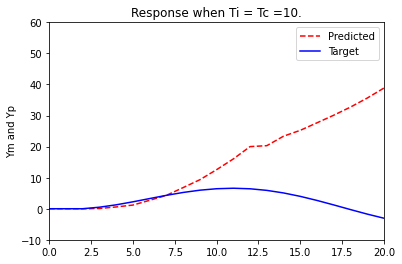

In [8]:
# specific parameters in this figure
steps = np.arange(0, 21)
yp = np.array([0, 0])
ym = np.array([0, 0])
u = 0

# model training
for k in range(len(steps)):
    p = np.array([1, yp[-1], yp[-2]])
    r = 2 * np.sin(2 * np.pi * k / 25)
    yp1 = yp[-2] * yp[-1] * (yp[-1] + 2.5)/(1 + (yp[-1])**2 + (yp[-2])**2) + u
    ym1 = 0.6 * ym[-1] + 0.2 * ym[-2] + r

    if k % 10==0:
        # forward
        v1 = np.dot(w1, p)
        phi_v1 = a * np.tanh(b * v1)
        y1_k = np.concatenate(([1], phi_v1))
        v2 = np.dot(w2, y1_k)
        y2 = v2
        error = yp1 - u - y2
        phi_v2_diff = 1
        phi_v1_diff = (b / a) * (a**2 - (phi_v1**2))

        # backward
        delta2 = error * phi_v2_diff
        delta_w2 = eta * np.outer(delta2, y1_k)
        delta1 = np.dot(w2[:, 1:].T, delta2) * phi_v1_diff
        delta_w1 = eta * np.outer(delta1, p)
        w1 = w1 + delta_w1
        w2 = w2 + delta_w2

        
        u = -y2 + 0.6 * yp[-1] + 0.2 * yp[-2] + r
        c = -y2
    else:
        
        u = c + 0.6 * yp[-1] + 0.2 * yp[-2] + r

    yp = np.append(yp, yp1)
    ym = np.append(ym, ym1)

# Plotting figure
K = np.arange(0, len(steps)+2)
plt.figure()
plt.plot(K, yp, '--r', K, ym, '-b')
plt.legend(['Predicted', 'Target'], loc='upper right')
plt.ylabel('Ym and Yp')
plt.title('Response when Ti = Tc =10.')
plt.axis([0, 20, -10, 60])
plt.show()